<a href="https://colab.research.google.com/github/Simran12solanki/Fundamental/blob/main/Simran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Title of Project :**
Bank Customer Churn Prediction


# **Objective :**


The primary objective of this project is to develop a robust churn prediction model that can accurately identify potential churners among bank customers. Through the analysis of various customer-related data such as transaction history, demographics, account activity, and customer interactions, the model aims to predict which customers are most likely to churn in the near future. By utilizing sophisticated machine learning algorithms and predictive analytics techniques, the model can identify patterns and indicators that are indicative of potential churn, allowing banks to take proactive measures to retain these customers and minimize customer attrition. Ultimately, the development of an accurate churn prediction model can significantly contribute to the reduction of customer churn rates and improve overall customer retention for banks.






# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None


# **Import Data**

In [ ]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

# **Describe Data**

In [ ]:
df.shape

(10000, 13)

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
Num Of Products,0
Has Credit Card,0


In [ ]:
df.nunique()

,0
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
Num Of Products,4
Has Credit Card,2


In [ ]:
df.dtypes


Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
Num Of Products       int64
Has Credit Card       int64
Is Active Member      int64
Estimated Salary    float64
Churn                 int64
dtype: object

In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df.set_index('CustomerId',inplace=True)


# **Data Visualization**

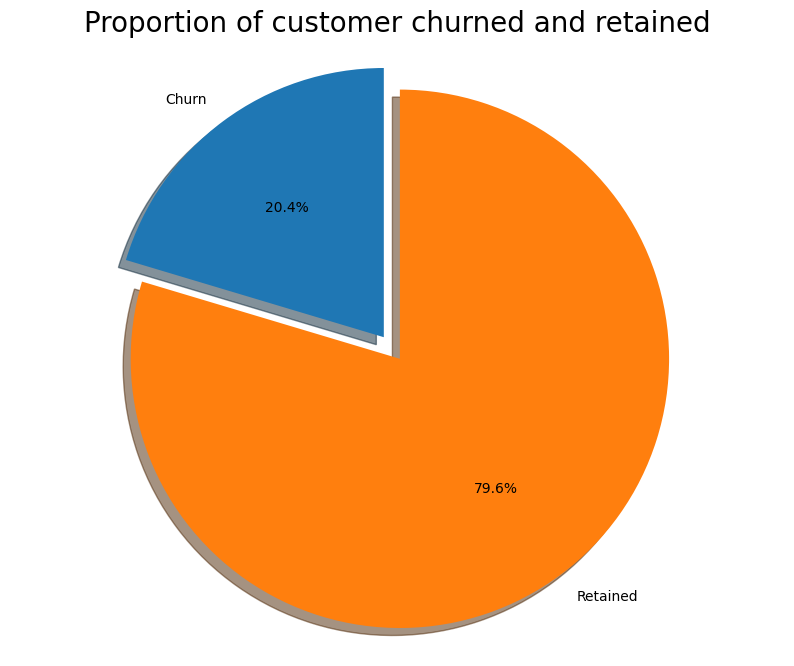

In [ ]:
labels = 'Churn', 'Retained'
sizes = [df.Churn[df['Churn']==1].count(), df.Churn[df['Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()


<Axes: xlabel='Is Active Member', ylabel='count'>

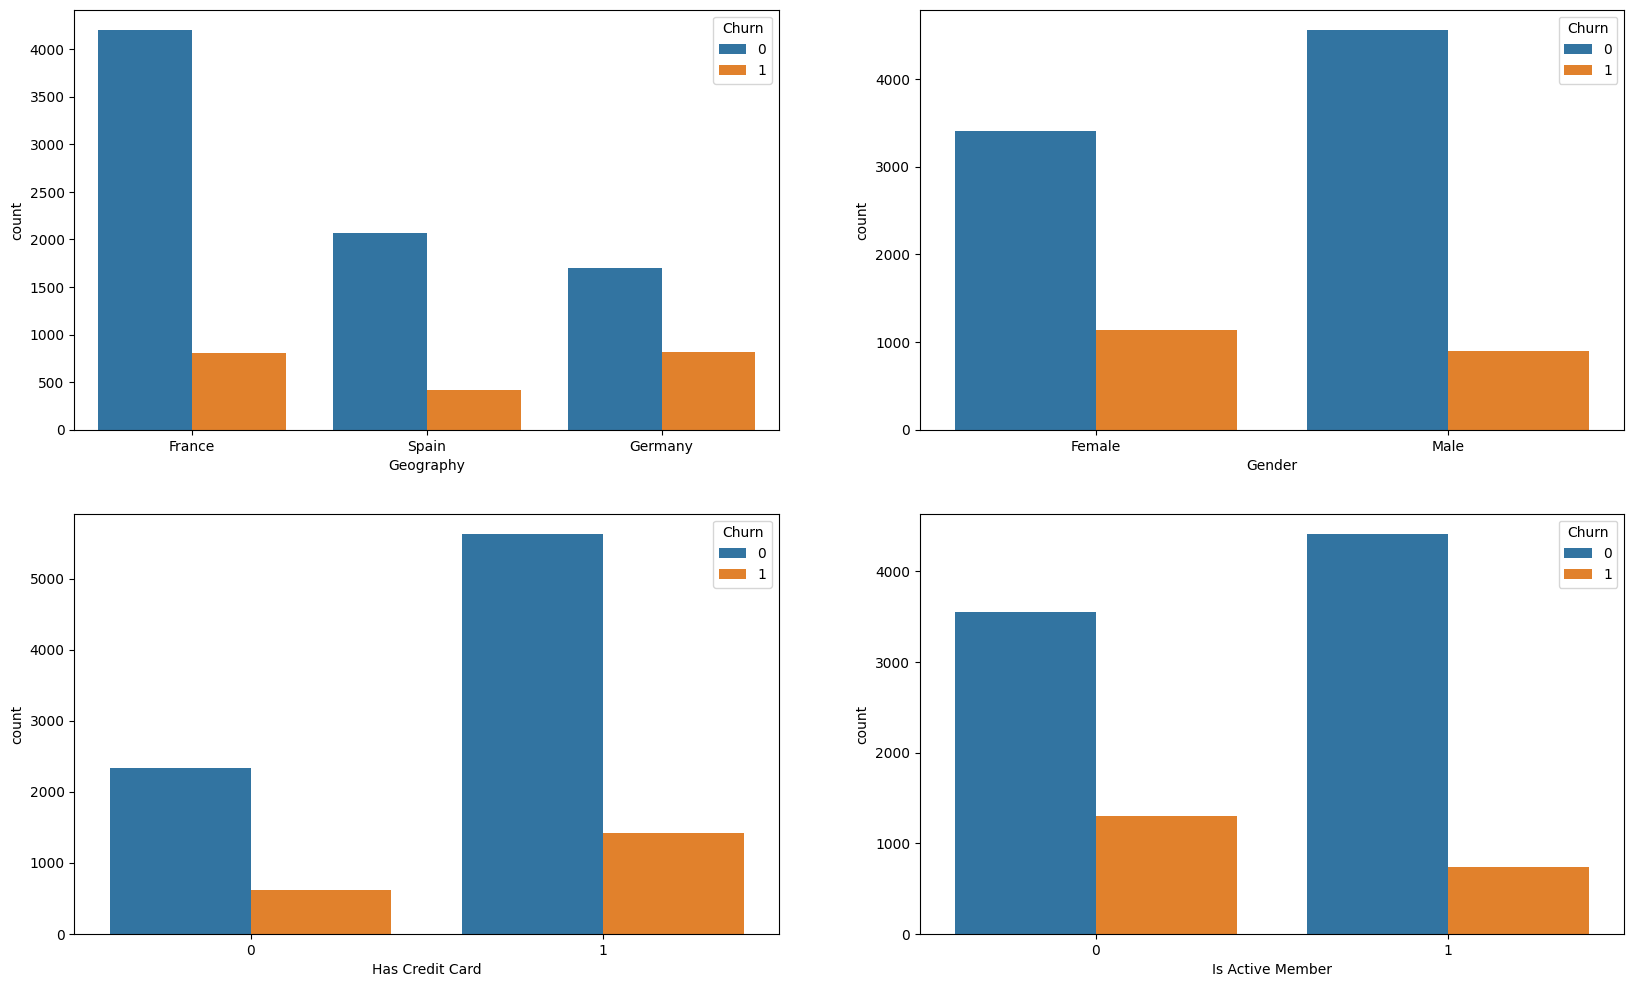

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Churn',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Churn',data = df, ax=axarr[0][1])
sns.countplot(x='Has Credit Card', hue = 'Churn',data = df, ax=axarr[1][0])
sns.countplot(x='Is Active Member', hue = 'Churn',data = df, ax=axarr[1][1])

<Axes: xlabel='Churn', ylabel='Estimated Salary'>

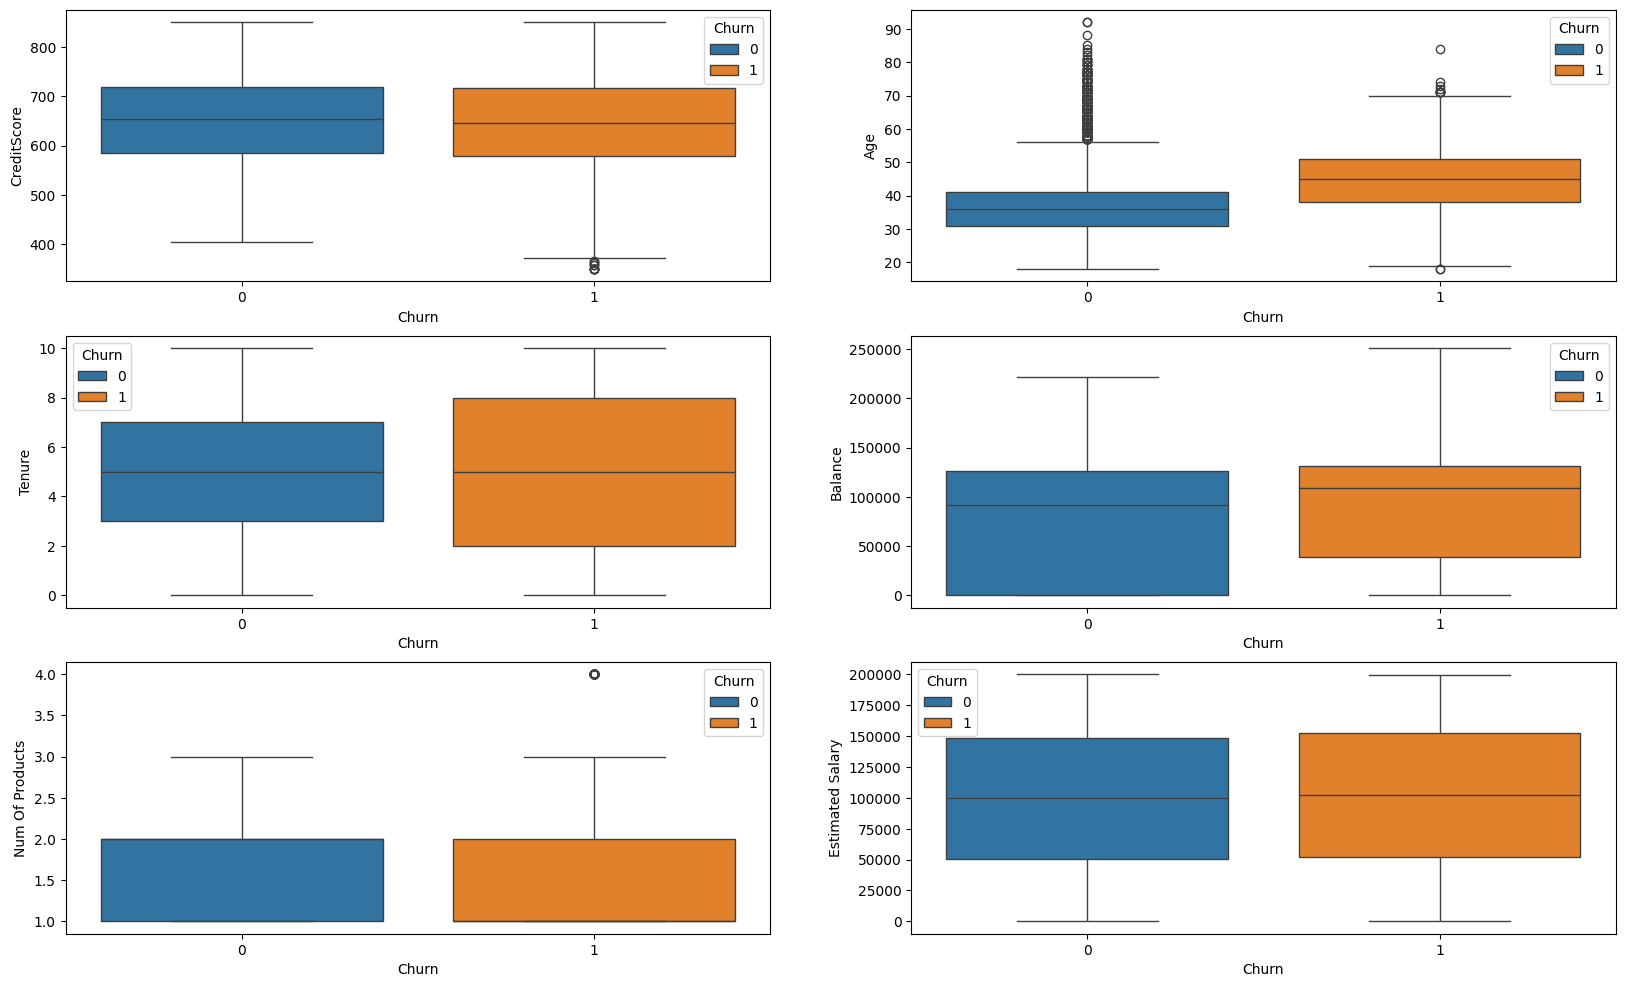

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Churn', hue = 'Churn',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Churn', hue = 'Churn',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Churn', hue = 'Churn',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Churn', hue = 'Churn',data = df, ax=axarr[1][1])
sns.boxplot(y='Num Of Products',x = 'Churn', hue = 'Churn',data = df, ax=axarr[2][0])
sns.boxplot(y='Estimated Salary',x = 'Churn', hue = 'Churn',data = df, ax=axarr[2][1])

# **Data Processing**

In [ ]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','Num Of Products', 'Estimated Salary', 'Balance',
                   'Tenure','CreditScore']
cat_vars = ['Has Credit Card', 'Is Active Member','Geography', 'Gender']
df_train = df_train[['Churn'] + continuous_vars + cat_vars]
df_train.head()

8000
2000


,Churn,CreditScore,Age,Tenure,Balance,Num Of Products,Estimated Salary,Balance,Tenure,CreditScore,Has Credit Card,Is Active Member,Geography,Gender
CustomerId,,,,,,,,,,,,,,
15637427,0,461,25,6,0.00,2,15306.29,0.00,6,461,1,1,Spain,Female
15793046,0,619,35,4,90413.12,1,20555.21,90413.12,4,619,1,1,France,Female
15658972,0,699,40,8,122038.34,1,102085.35,122038.34,8,699,1,0,France,Female
15679048,0,558,41,2,124227.14,1,111184.67,124227.14,2,558,1,1,Germany,Male
15582276,0,638,34,5,133501.36,1,155643.04,133501.36,5,638,0,1,France,Male


In [ ]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation
where the attribute in inapplicable instead of 0'''
df_train.loc[df_train['Has Credit Card'] == 0, 'Has Credit Card'] = -1
df_train.loc[df_train['Is Active Member']== 0, 'Is Active Member'] = -1
df_train.head()

,Churn,CreditScore,Age,Tenure,Balance,Num Of Products,Estimated Salary,Balance,Tenure,CreditScore,Has Credit Card,Is Active Member,Geography,Gender
CustomerId,,,,,,,,,,,,,,
15637427,0,461,25,6,0.00,2,15306.29,0.00,6,461,1,1,Spain,Female
15793046,0,619,35,4,90413.12,1,20555.21,90413.12,4,619,1,1,France,Female
15658972,0,699,40,8,122038.34,1,102085.35,122038.34,8,699,1,-1,France,Female
15679048,0,558,41,2,124227.14,1,111184.67,124227.14,2,558,1,1,Germany,Male
15582276,0,638,34,5,133501.36,1,155643.04,133501.36,5,638,-1,1,France,Male


In [ ]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == str or df_train[i].dtype == object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

,Churn,CreditScore,Age,Tenure,Balance,Num Of Products,Estimated Salary,Balance,Tenure,CreditScore,Has Credit Card,Is Active Member,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
CustomerId,,,,,,,,,,,,,,,,,
15637427,0,461,25,6,0.00,2,15306.29,0.00,6,461,1,1,1,-1,-1,1,-1
15793046,0,619,35,4,90413.12,1,20555.21,90413.12,4,619,1,1,-1,1,-1,1,-1
15658972,0,699,40,8,122038.34,1,102085.35,122038.34,8,699,1,-1,-1,1,-1,1,-1
15679048,0,558,41,2,124227.14,1,111184.67,124227.14,2,558,1,1,-1,-1,1,-1,1
15582276,0,638,34,5,133501.36,1,155643.04,133501.36,5,638,-1,1,-1,1,-1,-1,1


In [ ]:
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

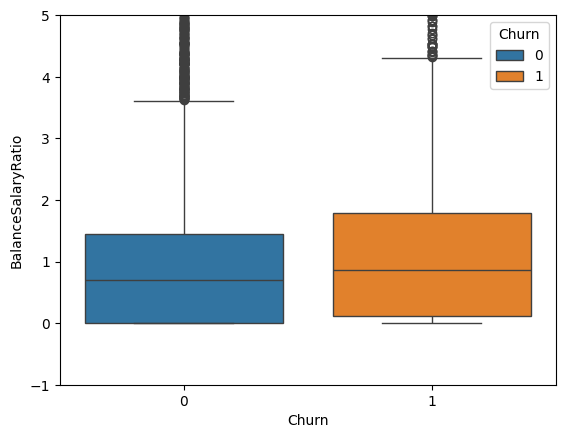

In [ ]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train['Estimated Salary']
sns.boxplot(y='BalanceSalaryRatio',x = 'Churn', hue = 'Churn',data = df_train)
plt.ylim(-1, 5)

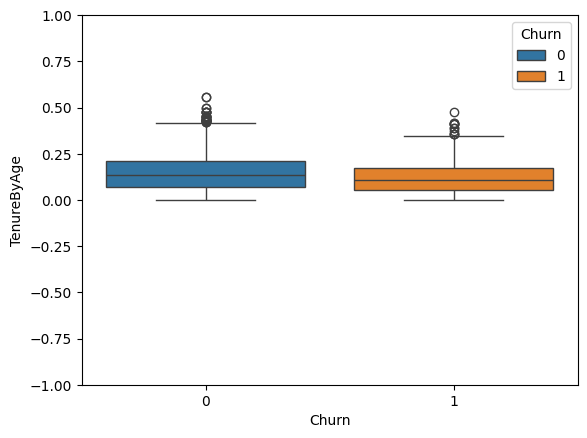

In [ ]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Churn', hue = 'Churn',data = df_train)
plt.ylim(-1, 1)
plt.show()


In [ ]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [ ]:
# Resulting Data Frame
df_train.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
CustomerId,,,,,,,,,,,,,,,
15637427,Lu,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
15793046,Holden,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
15658972,Foster,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
15679048,Koger,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
15582276,Greco,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


In [ ]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == str or df_train[i].dtype == object): # Use Python's built-in str and object types
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

,Churn,CreditScore,Age,Tenure,Balance,Num Of Products,Estimated Salary,Balance,Tenure,CreditScore,Has Credit Card,Is Active Member,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
CustomerId,,,,,,,,,,,,,,,,,,
15637427,0,461,25,6,0.00,2,15306.29,0.00,6,461,1,1,NaN,1,-1,-1,1,-1
15793046,0,619,35,4,90413.12,1,20555.21,90413.12,4,619,1,1,NaN,-1,1,-1,1,-1
15658972,0,699,40,8,122038.34,1,102085.35,122038.34,8,699,1,0,-1.0,-1,1,-1,1,-1
15679048,0,558,41,2,124227.14,1,111184.67,124227.14,2,558,1,1,NaN,-1,-1,1,-1,1
15582276,0,638,34,5,133501.36,1,155643.04,133501.36,5,638,-1,1,NaN,-1,1,-1,-1,1


In [ ]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min() # Remove .copy() as it might be causing issues
maxVec = df_train[continuous_vars].max() # Remove .copy() as it might be causing issues

# Use .values to extract the underlying numpy arrays for proper broadcasting
df_train[continuous_vars] = (df_train[continuous_vars].values - minVec.values) / (maxVec.values - minVec.values)
df_train.head()

,Churn,CreditScore,Age,Tenure,Balance,Num Of Products,Estimated Salary,Balance,Tenure,CreditScore,Has Credit Card,Is Active Member,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
CustomerId,,,,,,,,,,,,,,,,,,
15637427,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.6,0.222,1,1,NaN,1,-1,-1,1,-1
15793046,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.360358,0.4,0.538,1,1,NaN,-1,1,-1,1,-1
15658972,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.486406,0.8,0.698,1,0,-1.0,-1,1,-1,1,-1
15679048,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.495130,0.2,0.416,1,1,NaN,-1,-1,1,-1,1
15582276,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.532094,0.5,0.576,-1,1,NaN,-1,1,-1,-1,1


In [ ]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"]
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict
6.

6.0


# **Define Target Variable (y) and Feature Variables (X)**


In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
y=df['Churn']

In [ ]:
X=df.drop(['Surname','Churn'],axis=1)

In [ ]:
X.shape,y.shape

((10000, 10), (10000,))


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3000, 10), (7000, 10), (3000,), (7000,))

# **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'X' is your original feature DataFrame
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column contains strings
        X[column] = label_encoder.fit_transform(X[column])

# Now, split the data after converting strings to numerical labels
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)

# Proceed with model fitting
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to your training data
model.fit(X_train, y_train)  # Assuming X_train and y_train are defined

# Now you can access the intercept
model.intercept_

-0.13558165158243707

In [ ]:
model.coef_

array([-4.05653284e-06,  8.67349707e-03, -7.75384537e-02,  1.14522569e-02,
       -3.07412500e-03,  7.21260050e-07,  1.38374921e-02, -1.02271617e-02,
       -1.44005042e-01, -1.71853296e-08])

# **Model Evaluation**

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example: Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 0.1406851704486411
Mean Absolute Error: 0.2853552168783198
R-squared: 0.1358741652649037


In [ ]:
from sklearn.model_selection import cross_val_score

# Example: Cross-validation for classification model
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')


Cross-validation scores: [0.15451844 0.1317867  0.1344971  0.14815045 0.10008433]
Mean accuracy: 0.1338074043948198


HyperParameter tuning

In [ ]:
param_grid = {
    'C': [0.1, 1,10],
    'gamma': [1, 0.1,0.01],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1,10],
    'gamma': [1, 0.1,0.01],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

grid_rus=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=5) # Now SVC is defined and can be used.
grid_rus.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_rus = grid_rus.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix # Import the missing function
confusion_matrix(y_test,grid_preprdictions_rus)

array([[5567,    0],
       [1433,    0]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5567
           1       0.00      0.00      0.00      1433

    accuracy                           0.80      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.63      0.80      0.70      7000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Model Accuracy**

In [ ]:
confusion_matrix(y_test,grid_predictions_rus)

array([[5567,    0],
       [1433,    0]])

In [ ]:
print(classification_report(y_test,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5567
           1       0.00      0.00      0.00      1433

    accuracy                           0.80      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.63      0.80      0.70      7000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mean_absolute_error(y_test,y_pred)

0.2853552168783198

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

640458394932873.8

In [ ]:
mean_squared_error(y_test,y_pred)

0.1406851704486411

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

# Load dataset (replace 'data.csv' with your dataset path)
# Assuming dataset has a column 'churn' as the target variable
data =pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

# Feature columns (all columns except 'churn')
# Exclude columns with non-numeric data like 'CustomerId', 'Surname', 'Geography', 'Gender'
X = data.drop(columns=['Churn', 'CustomerId', 'Surname', 'Geography', 'Gender'])
# If you want to include 'Geography' and 'Gender', you need to one-hot encode them first
# X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

y = data['Churn']

# Split the data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for models that require it (e.g., SVM, Logistic Regression, Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # SVM with probability estimates for AUC
    'XGBoost': xgb.XGBClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Initialize dictionary to store results
results = {}

# Train models and evaluate performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display the results table
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   AUC-ROC
Logistic Regression    0.8095   0.555556  0.152672  0.239521  0.756450
Decision Tree          0.7700   0.425721  0.488550  0.454976  0.663690
Random Forest          0.8595   0.741379  0.437659  0.550400  0.839028
SVM                    0.8515   0.769663  0.348601  0.479860  0.797411
XGBoost                0.8430   0.645756  0.445293  0.527108  0.819159
Neural Network         0.8540   0.722467  0.417303  0.529032  0.839739


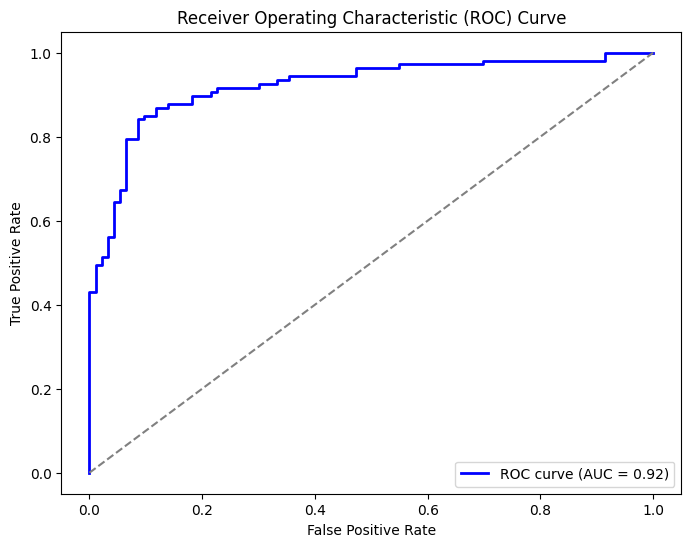

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate a simple binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show the legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


# **Model Prediction**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0.11259512, 0.33301779, 0.4042985 , ..., 0.15725421, 0.03631454,
       0.06646677])

# **Explanation**

The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned :-)